# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Allow google Colab access to my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/My Drive/ColabNotebooks/Project5/EasyVisa.csv')

In [4]:
# Copy dataset
df=data.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Preview the data
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
# Get row and column count
df.shape

(25480, 12)



*   The dataset has 25480 rows and 12 columns of data



In [ ]:
# Check for any null values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Review datatypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [5]:
# Collect all the object datatypes
cols=df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [6]:
# Change object columns to category datatype
for i in cols.columns:
    df[i]= df[i].astype('category')

In [7]:
# Review datatypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


In [ ]:
# Statistical summary of numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27




*   The average number of employees at a business is 5,667, while the median is 2,109 employees. 
*   The IQR range for year business started is 1976-2016. Ths column has some major outliers that are skewing the data to the left. 
*   Average wage of an employee is 74,455, while the median wage is 70,308.


In [8]:
# Drop case_id since it is not relevant to the model
df.drop(['case_id'],axis=1,inplace=True)

In [9]:
# Convert column to absolute values
from numpy.ma.core import absolute
df['no_of_employees']=abs(df['no_of_employees'])

In [10]:
# Statistical summary of categorical data
df.describe(include=['category']).T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


**Summary**


*   There are no missing or duplicate values. 
*   I converted the object type columns into categories. 
*   Dropped the ID column since it is a unique value for each row. 
*   Updated prevailing wage column to absolute values




In [11]:
# Create a dataframe of call categorical data
cols_cat=df.select_dtypes(['category'])

In [12]:
# Get percentage breakdown oof categorial variables
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize=True))
    print('*'*50)

Unique values in continent are :
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: continent, dtype: float64
**************************************************
Unique values in education_of_employee are :
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: education_of_employee, dtype: float64
**************************************************
Unique values in has_job_experience are :
Y    0.580926
N    0.419074
Name: has_job_experience, dtype: float64
**************************************************
Unique values in requires_job_training are :
N    0.884027
Y    0.115973
Name: requires_job_training, dtype: float64
**************************************************
Unique values in region_of_employment are :
Northeast    0.282378
South        0.275392
West         0.258477
Midwest      0.169035
Island       0.014717
Name: re

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Helper Codes

In [40]:
# Function to build histogram and boxplot together
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# Function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# Function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate 

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does **education** play a role in Visa certification? 

2. How does the** visa** status vary across different **continents**? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work **experience** influence **visa** status? 
 
4. In the United States, employees are paid at different intervals. Which **pay unit** is most likely to be **certified for a visa**? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the **visa** status change with the **prevailing wage?**

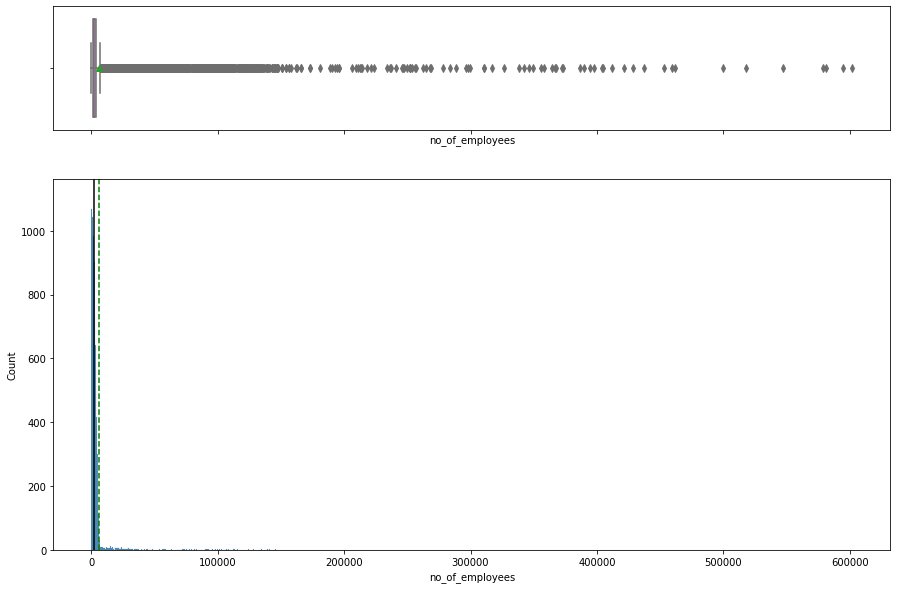

In [ ]:
# Visualize the number of employees
histogram_boxplot(df, 'no_of_employees')

In [ ]:
# Check the values for the column
df['no_of_employees'].sort_values(ascending=True)

23476        11
16157        11
378          11
15859        11
14726        11
          ...  
9587     547172
11317    579004
20345    581468
1345     594472
21339    602069
Name: no_of_employees, Length: 25480, dtype: int64

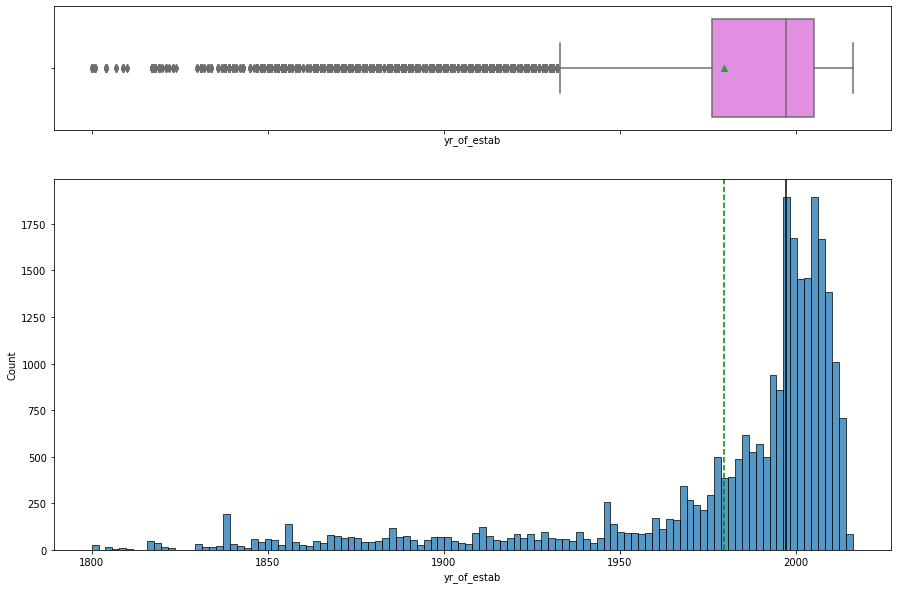

In [ ]:
# Visualize year of establishment
histogram_boxplot(df, 'yr_of_estab')

*   The IQR falls between the late 1976 to 2016. 
*   In this case there are many outliers in the data.
*   The earlier established companies are skewing the data to the left.
*   It will be interesting to see how the companies established over 50 years ago compare to new companies that are starting up. 



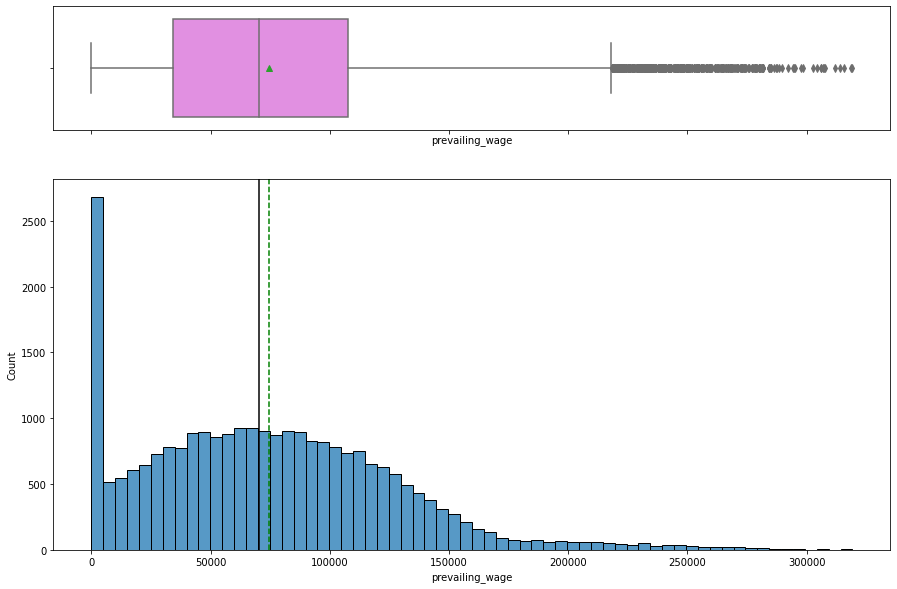

In [ ]:
# Visualize prevailing wage
histogram_boxplot(df, 'prevailing_wage')

In [ ]:
df['prevailing_wage'].value_counts(ascending=True)

592.2029       1
132008.4100    1
74323.0800     1
144724.0700    1
79637.1800     1
              ..
108.1200       2
58770.0500     2
134.1500       2
118.4300       2
105.9600       2
Name: prevailing_wage, Length: 25454, dtype: int64

In [ ]:
# Locate all values under $100
df.loc[df['prevailing_wage']<=100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [ ]:
# Locate all columns with unit of wage "hour"
df.loc[df['unit_of_wage']=='Hour']

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
7,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
54,Asia,Master's,Y,N,11733,1995,Northeast,230.8072,Hour,Y,Certified
62,Asia,High School,N,N,5110,2004,West,103.2216,Hour,Y,Denied
70,Asia,High School,Y,N,1320,2001,Northeast,230.3270,Hour,Y,Denied
...,...,...,...,...,...,...,...,...,...,...,...
25444,South America,Master's,Y,N,1081,1838,Northeast,156.6070,Hour,Y,Certified
25450,Asia,Bachelor's,N,N,3312,2009,Northeast,682.1048,Hour,Y,Denied
25461,Asia,Master's,Y,N,2861,2004,West,54.9196,Hour,Y,Denied
25465,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified




*   Prevailing wage is an odd column due to how wages are stored in the system. 
*   Each unit of wage is stored the same, but not scaled accordingly. 
*   It would be false to remove the low values, so the data will stay as is. 


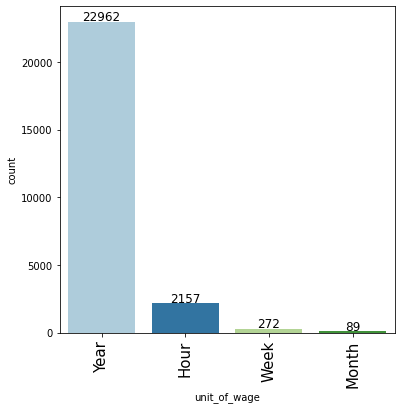

In [ ]:
# Visualize unit of wage
labeled_barplot(df, 'unit_of_wage')

*   Most Visa applicants unit of wage is based on the year. 
*   The second highest value is hourly wage which is only 8.5% of applicants. 
*   It would have been helpful to contextualize these applicants by industry. 



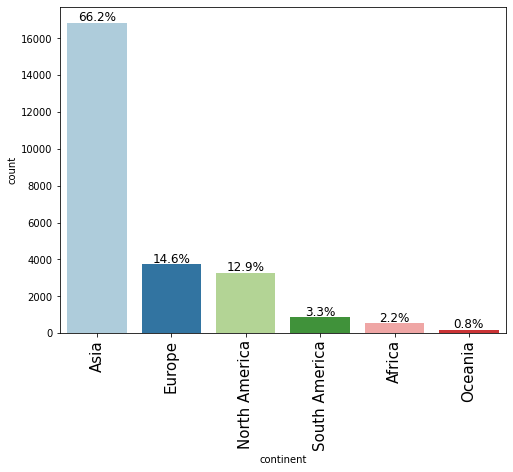

In [ ]:
# Visualize continents represented
labeled_barplot(df, 'continent', perc=True)

*    66% of Visa applications are coming from the Asia continent. 
*    This is almost two times greater than all the other continents listed combined. 
*    It would have been helpful if the data was pulled by country, rather than continent. 

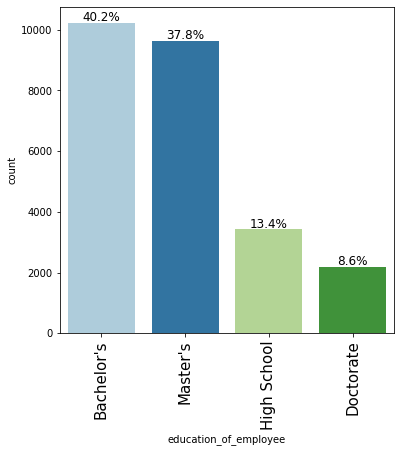

In [ ]:
# Visualize education levels of employees
labeled_barplot(df, 'education_of_employee', perc=True)

*    This type of data is ranked: High School:0, Bachelor's:1, Master's:2, Doctorate 3. 
*    The most common education level is Bachelor's and Master's is second with a 2.4% difference. 

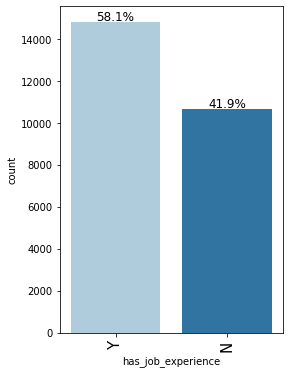

In [ ]:
# Visualize if employees have job experience
labeled_barplot(df, 'has_job_experience', perc=True)

*   58.1% of applicants have job experience, while 41.9% have no experience. 



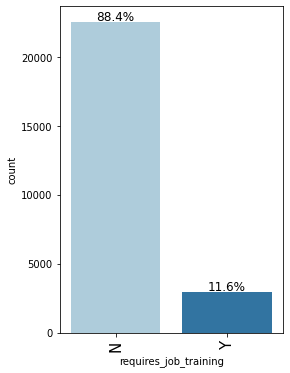

In [ ]:
# Visualize if job training is required
labeled_barplot(df, 'requires_job_training', perc=True)



*   Only 11.6% of Visa applicants require additional training. 
*   It would have been helpful to know the employment field that requires training. 



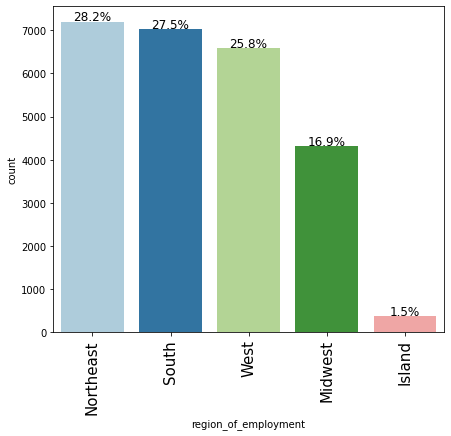

In [ ]:
#  Visualize region of employment
labeled_barplot(df, 'region_of_employment', perc=True)

*    The top 3 regions account for 81.5% of applicants. 
*    Most will be working in the Northeast, South, or West. 

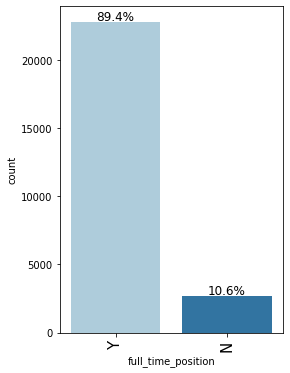

In [ ]:
# Visualize if job is full time employment
labeled_barplot(df, 'full_time_position', perc=True)

*   A high majority of applicants are seeking full time employment.



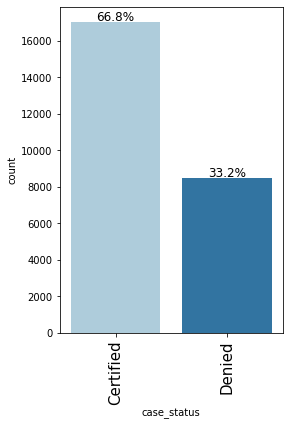

In [ ]:
# Visualize case status
labeled_barplot(df, 'case_status', perc=True)



*   66.8% of all Visa applications are approved. This is 17018 applicants approved.


 Summary

*    Case status is our target variable with 66% of Visas being certified. 
*    In most Visa cases, employees salaries are categorized yearly.
*    Most Visa cases are for full time positions and do not require traveling for work. 
*    58% of applicants have job experience. 
*    88% of jobs do not require additional training. 



### Bivariate Analysis

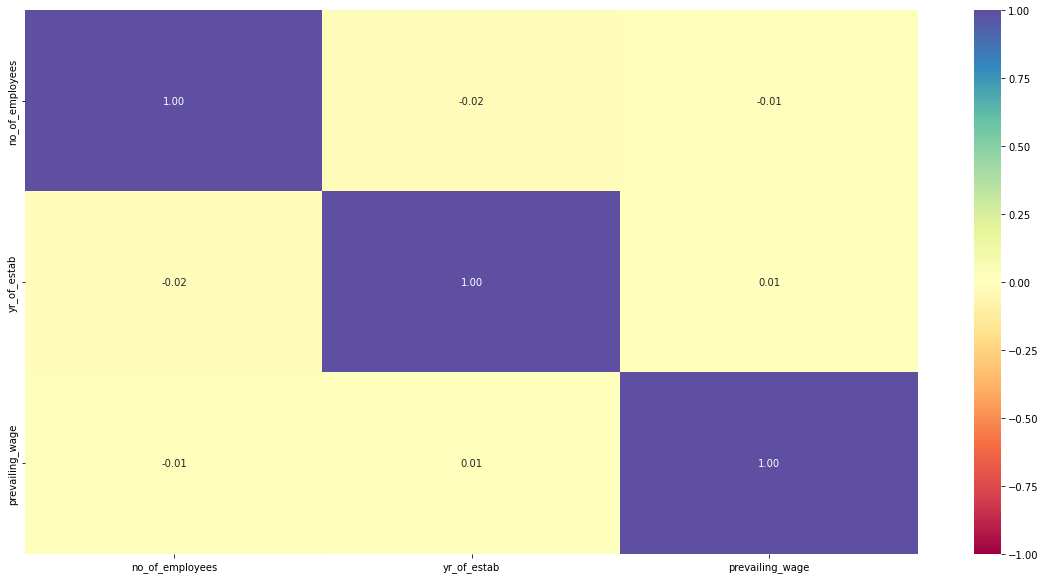

In [ ]:
# Visualize numerical column correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap="Spectral")
plt.show()

Heatmap indicates there is no correlation in the continuous data. 

In [ ]:
df.columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


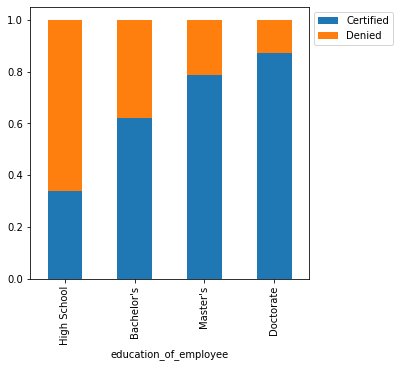

In [ ]:
# Visualize case status by education of employee
stacked_barplot(df,'education_of_employee','case_status' )

The group with the lowest certified visa status is high school diploma holders. Those more likely to be certified are those with doctorate degrees. Out of Bachelor's degree holders, 60% are certified. 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


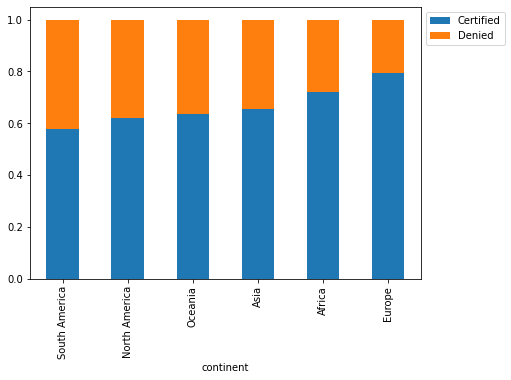

In [ ]:
# Visualize case status by their continent
stacked_barplot(df,'continent','case_status' )

The continent with the most approved visas is Europe. All countries have a certification rate of at least 58% of their applicants. The group with the lowest certified rate is South America. 

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


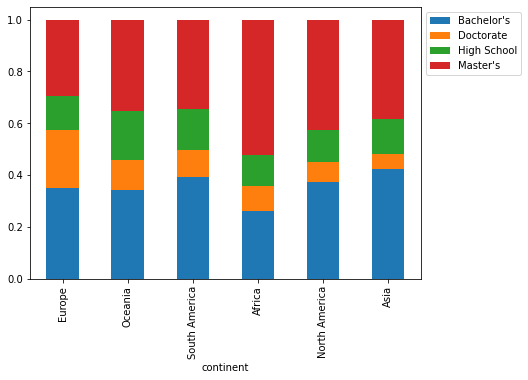

In [ ]:
# Visualize education of employee by continent
stacked_barplot(df, "continent", "education_of_employee")

Europe, the continent with the highest certification rate, also has the most Doctorate holders. South Africa has the highest number of Master's applicants. 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


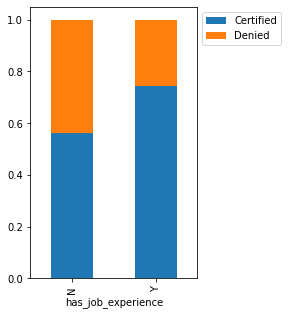

In [ ]:
# Visualize case status by if they have job experience
stacked_barplot(df,'has_job_experience','case_status' )

Out of applicants that have job experience 74% are certified. Those without experience 56% are certified. 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


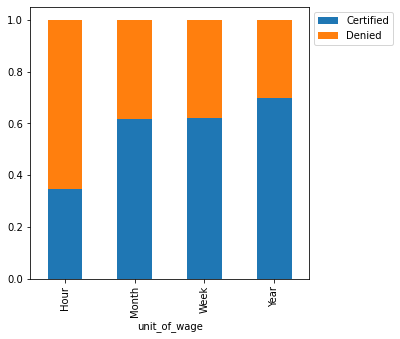

In [ ]:
# Visualize case status by unit of wage
stacked_barplot(df,'unit_of_wage','case_status' )

Those applicants that would be paid an hourly wage are approved less frequently than other applicants. The visa certification rate is consistent across other unit of wages. 

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


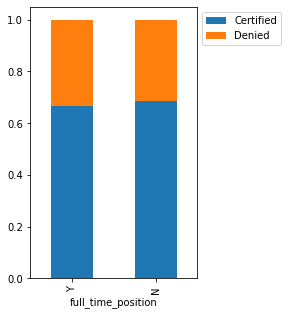

In [ ]:
# Visualize case status by full time position
stacked_barplot(df, 'full_time_position','case_status', perc=True)

The certification rate between full time and part time employment are very similar. 

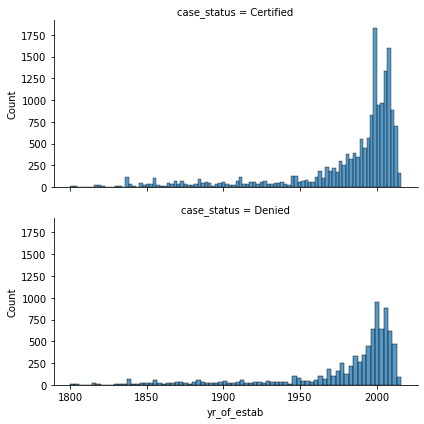

In [ ]:
#Compare case status by year of company establishment
g=sns.FacetGrid(df, col='case_status', col_wrap=1, margin_titles=True, aspect=2)
g.map(sns.histplot, 'yr_of_estab');

This graph seems to indicate that as more companies came to be in the 1980's and 1990's there were more visas certified. Visa denials are binomial with most denied cases falling between the late 1990s and early 2000s.

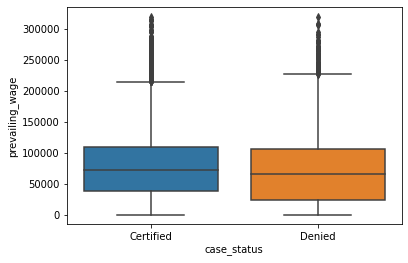

In [ ]:
# Compare distribution of case status by prevailing wage
sns.boxplot(data=df, x='case_status', y='prevailing_wage')

This graph would seem to indicate that prevailing wage is less of a factor of visa certification/denial compared to things like unit of wage or level of education. This could be because some highly educated individuals might be taking jobs with lower wages. 

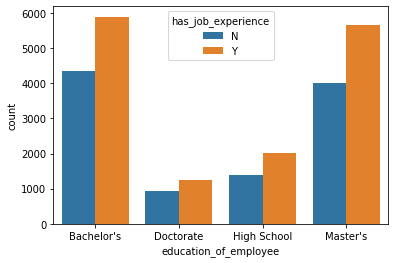

In [ ]:
# Compare the job experience of employees to their level of education
sns.countplot(data=df, x='education_of_employee', hue='has_job_experience')

Across the different levels of education, a majority of individuals have work experience. Since the higher level of education means longer years in school, you would expect there to be less experience among Master's and Doctorate applicants. However there is only a slight increase in  the proportion of no experience applicants in these two variables. 

**Summary**

Evaluating the independent variables against our dependent variable (case status) created a clear picture of factors that greatly impact chances of visas being denied such as: 

*   Level of education
*   If you are paid hourly
*   If you had no job experience

The other variables like continent or prevaling wage saw slight variation between variables. 




## Data Preprocessing


In [13]:
# Create a company age column from year of establishment
df["company_age"] = 2016 - df["yr_of_estab"]
# drop year of establishment from dataset
df.drop(["yr_of_estab"], axis=1, inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,9
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,14
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,8
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,119
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,11


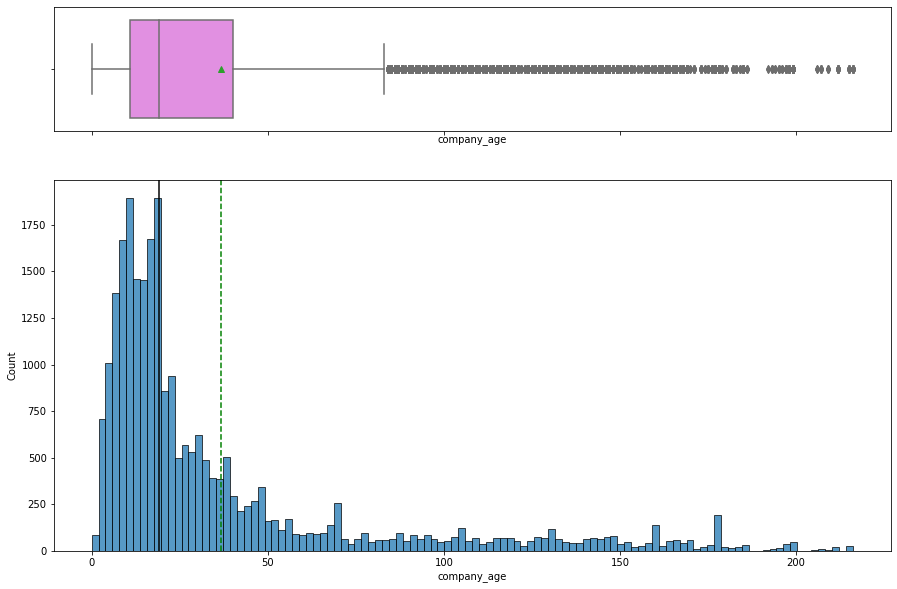

In [41]:
# Visualize company age column
histogram_boxplot(df, "company_age")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   region_of_employment   25480 non-null  category
 6   prevailing_wage        25480 non-null  float64 
 7   unit_of_wage           25480 non-null  category
 8   full_time_position     25480 non-null  category
 9   case_status            25480 non-null  category
 10  company_age            25480 non-null  int64   
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


In [15]:
# Change education column to a ranked value column
replaceStruct ={
               "education_of_employee":    {"High School":1, "Bachelor's":2, "Master's":3, "Doctorate":4}   
}
# Create a dataframe for columns that need one hot end encoding
oneHotCols=["continent", "has_job_experience", "requires_job_training", "region_of_employment", "unit_of_wage", "full_time_position", "education_of_employee", ]

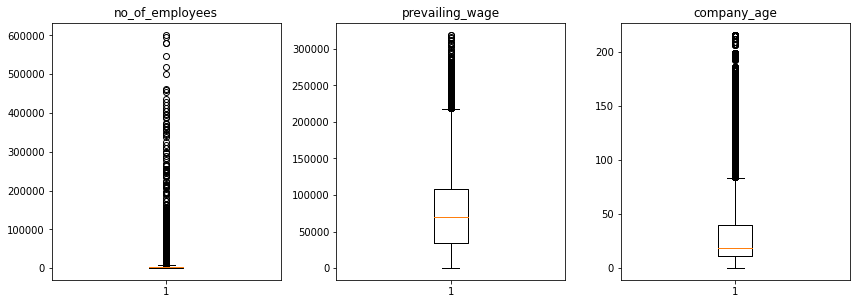

In [16]:
# Outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(12, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [17]:
# Get dummies on one hot encoding columns
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols)
df.head()

,no_of_employees,prevailing_wage,case_status,company_age,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,...,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y,education_of_employee_1,education_of_employee_2,education_of_employee_3,education_of_employee_4
0,14513,592.2029,Denied,9,0,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1,2412,83425.6500,Certified,14,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
2,44444,122996.8600,Denied,8,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,98,83434.0300,Denied,119,0,1,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
4,1082,149907.3900,Certified,11,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0


**Summary**


*   Created a column to show age of the companies observed. 
*   Removed yr_of_estab column
*   Treated categorical columns using one-hot encoding, get_dummies, or changing to ranked values.
*   There are no unexpected outliers in this dataset.  



## EDA

- It is a good idea to explore the data once again after manipulating it.

In [ ]:
df.describe()

,no_of_employees,prevailing_wage,company_age,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,has_job_experience_N,...,unit_of_wage_Hour,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_N,full_time_position_Y,education_of_employee_1,education_of_employee_2,education_of_employee_3,education_of_employee_4
count,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,...,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000,25480.000000
mean,5667.089207,74455.814592,36.590071,0.021625,0.661735,0.146468,0.129199,0.007535,0.033438,0.419074,...,0.084655,0.003493,0.010675,0.901177,0.106240,0.893760,0.134223,0.401648,0.378100,0.086028
std,22877.917453,52815.942327,42.366929,0.145458,0.473129,0.353582,0.335427,0.086480,0.179781,0.493417,...,0.278373,0.058999,0.102769,0.298430,0.308151,0.308151,0.340898,0.490241,0.484922,0.280411
min,11.000000,2.136700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1022.000000,34015.480000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2109.000000,70308.210000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3504.000000,107735.512500,40.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,602069.000000,319210.270000,216.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Building bagging and boosting models

#### Project Planning: 
EasyVisa is focused on a Machine Learning model to better which visas will be certified and denied.  
Errors that could occur in this case are: 
This would indicate the company wants clear insight on the 

*   Identified applicants as denied that should have been certified. 
*   Identifying applicants as certified that should have been denied. 

Based on the business question, the areas we want to focus are: increasing the number of true positives, and decreasing the number of false negatives. 

Keeping these two areas in mind it would be appropriate to use the F-1 score, while still keeping an eye on Recall to best evaluate each model. 



In [18]:
# Create X and y for model building
X = df.drop('case_status', axis=1)
y = df['case_status'].apply(lambda x : 0 if x=='Denied' else 1 )

In [19]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 28) (7644, 28)


In [20]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [21]:
# Defining a function to return confusion matrix on models
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##  Will tuning the hyperparameters improve the model performance?

#### Decision Tree - Model Building and Hyperparameter Tuning




Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.660518  0.742997   0.747242  0.745113


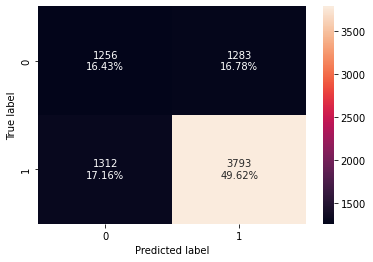

In [23]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

In [24]:
#Choose the type of classifier. 
dtree_estimator_tuned = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator_tuned, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=8,
                       max_leaf_nodes=15, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.660518  0.742997   0.747242  0.745113


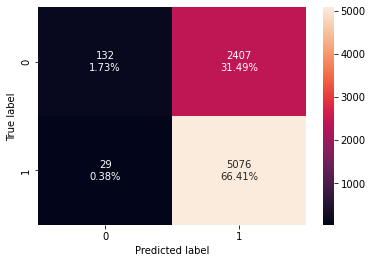

In [25]:
 # Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

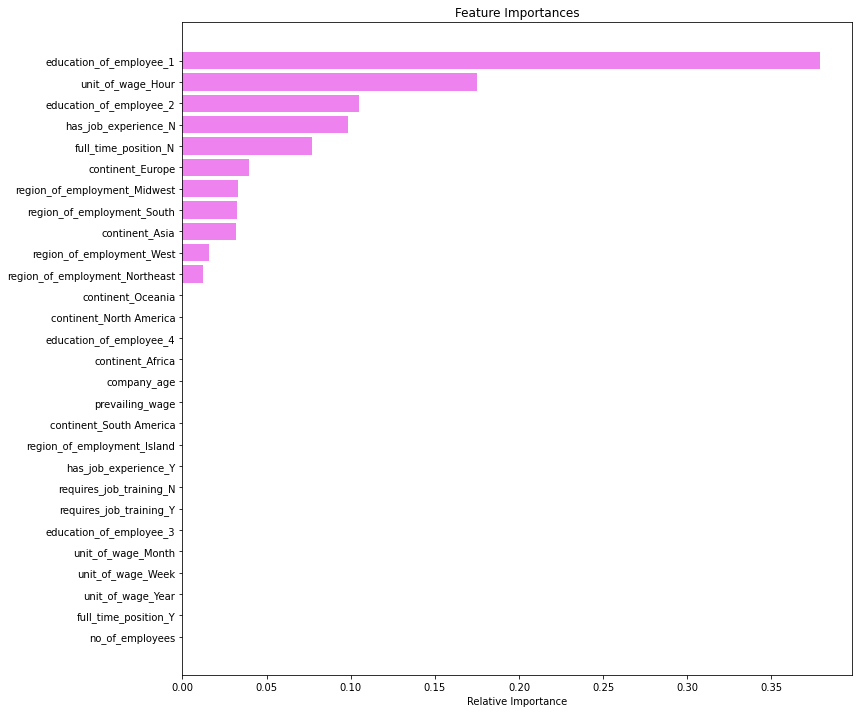

In [ ]:
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Insights


*   This decision tree resulted in a F1 score of 74.5% on both training and test data. 
*   It is a good baseline estimator to check the performance on the rest of the models. 



#### Bagging Classifier- Model Building and Hyperparameter Tuning

   Accuracy    Recall  Precision        F1
0  0.983685  0.984471   0.991043  0.987746
   Accuracy    Recall  Precision        F1
0  0.701596  0.776298   0.776754  0.776526


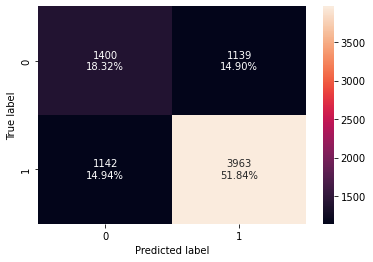

In [26]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

In [27]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=50,
                  random_state=1)

   Accuracy    Recall  Precision        F1
0  0.997085  0.999496   0.996152  0.997821
   Accuracy  Recall  Precision        F1
0   0.72763  0.8619   0.761641  0.808675


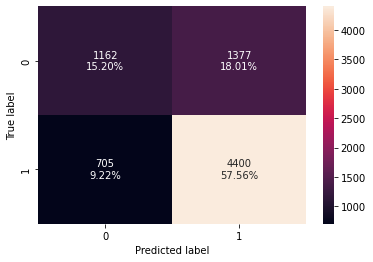

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

**Insights**
*   Tuning the bagging classifier improved the F1 score on test data by .032.
*   Hyperparameters greatly improved the recall score on test data as well. 



#### AdaBoost Classifier - Model Building and Hyperparameter Tuning

   Accuracy    Recall  Precision       F1
0  0.738058  0.886259   0.760937  0.81883
   Accuracy    Recall  Precision        F1
0  0.734301  0.883252    0.75858  0.816182


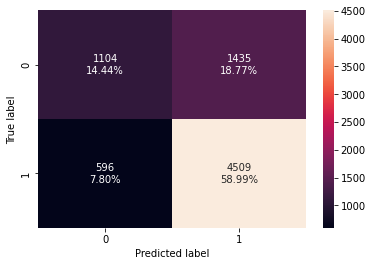

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.5, n_estimators=10, random_state=1)

   Accuracy    Recall  Precision        F1
0   0.75314  0.877613   0.780224  0.826058
   Accuracy    Recall  Precision        F1
0  0.742151  0.873653   0.770826  0.819025


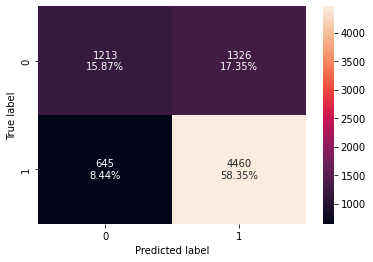

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

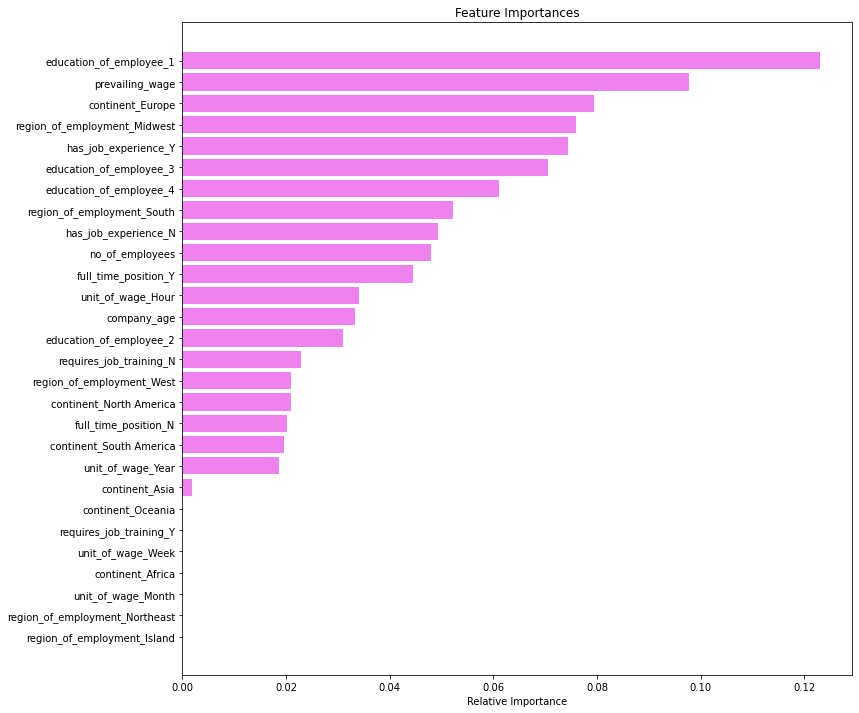

In [ ]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Insights


*   Using hyperparameter tuning on adaboosting classifier resulted in a slight change in F1 score of .003. 
*   This decrease is due to recall score falling by.010 and precision increasing by .770. 
*   This classifier's two most important features are level of education: high school diploma and prevailing wage. 



#### Gradient Boosting Classifier - Model Building and Hyperparameter Tuning

Training performance:
    Accuracy    Recall  Precision       F1
0  0.757849  0.883657   0.782095  0.82978
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745814  0.878355   0.772305  0.821923


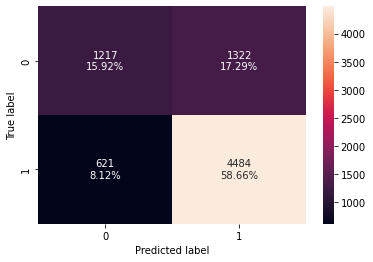

In [28]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

In [29]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.7, random_state=1, subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756952  0.882229   0.781878  0.829028
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746206  0.875024   0.774311  0.821593


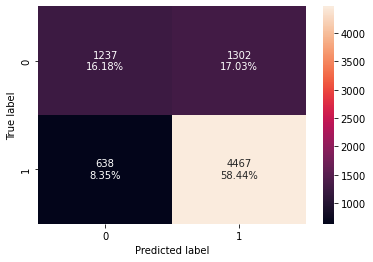

In [30]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

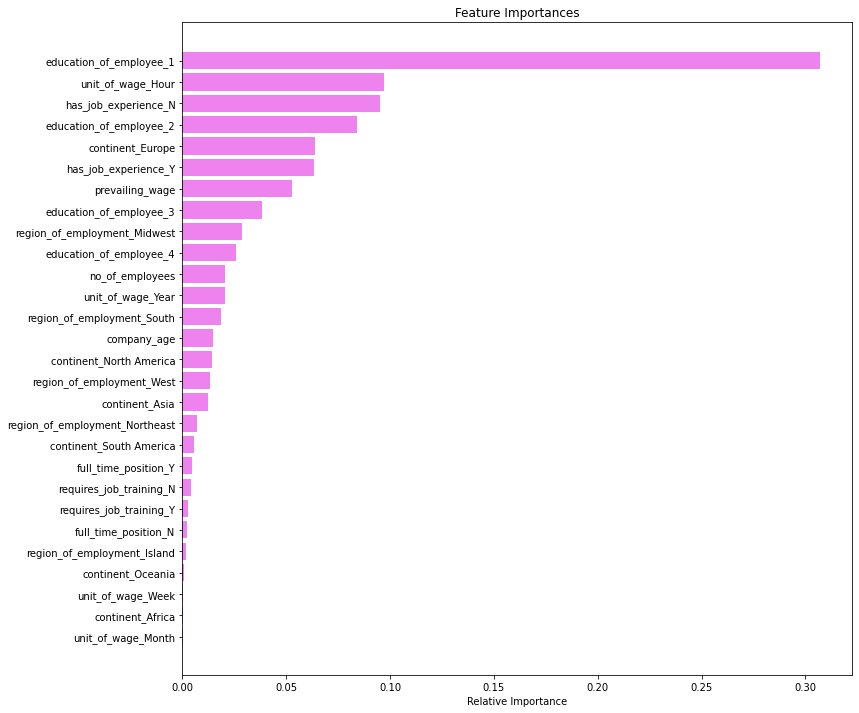

In [31]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Insights:


*   Tuning the hyperparameters on Adaboost classifier resulted in a .010 decrease in recall and a .003 increase in F1 score. 
*   Feature importance shows that education level of high school, and being paid on an hourly basis are two of the most important factors in a Visa application being denied. 



#### XGBoost Classifier - Model Building and Hyperparameter Tuning

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755663  0.882901   0.780209  0.828385
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876983   0.771897  0.821091


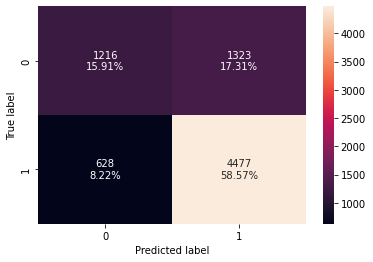

In [33]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

In [34]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Run the grid search
grid_obj = HalvingGridSearchCV(xgb_tuned, parameters,scoring=scorer,n_jobs=-1, min_resources="exhaust", factor=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(eval_metric='logloss', n_estimators=30, random_state=1,
              scale_pos_weight=5, subsample=0.7)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.668592  0.999916   0.668387  0.801211
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.668367     1.0   0.668194  0.801098


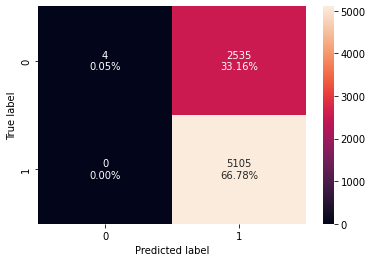

In [35]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

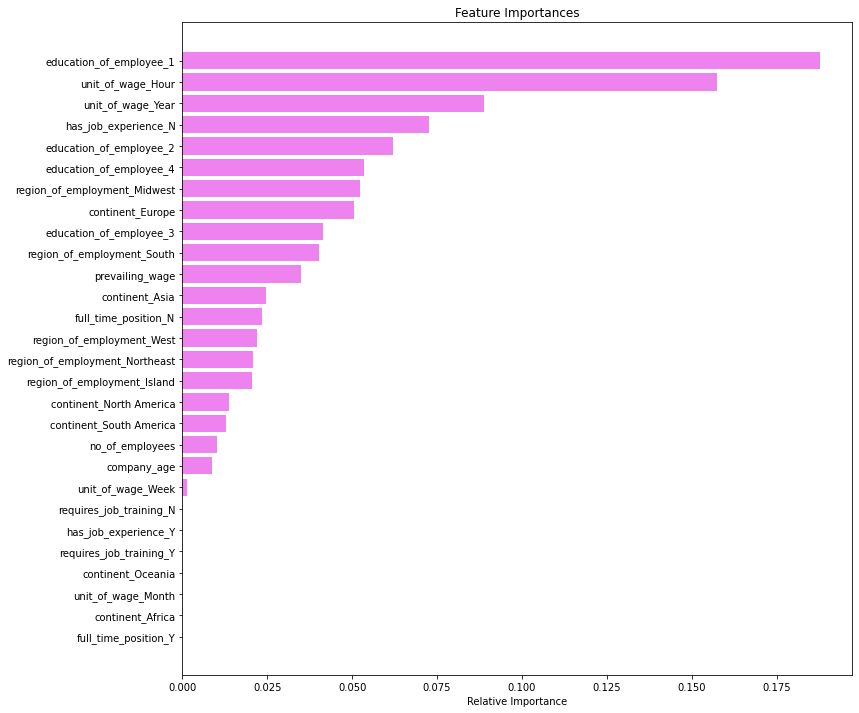

In [36]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Insights**


*   Extreme gradient boosting had a F1 score of .821 on the training data, but F1 score decreased to .813 on the test dataset.  
*   This lower score was a result of Recall seeing a major improvement to .949, at the expense of accuracy and precision. 
*   As demonstrated by other models, the important factors to a case being denied is if level of education is high school and if they are being paid on an hourly basis.



### Stacking Model

In [37]:
estimators = [('Bagging Classifier', bagging_estimator_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Bagging Classifier',
                                BaggingClassifier(max_features=0.7,
                                                  max_samples=0.8,
                                                  n_estimators=50,
                                                  random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.7,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.18,
                                                                     1: 0.72},
                                                       max_depth=8,
                     

Training performance:
    Accuracy  Recall  Precision        F1
0  0.686253     1.0   0.680393  0.809802
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.675039  0.999216   0.672866  0.804194


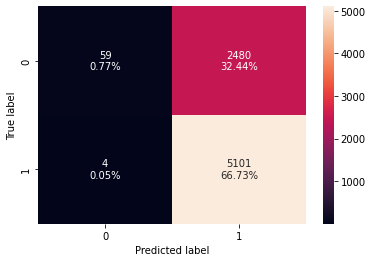

In [38]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

**Insights**

*   Stacking had the third best F1 score of .817. 
*   However, it's recall score was the highest at .958. 



## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,1.0,0.983685,0.997085,0.738058,0.753140,0.757849,0.756952,0.755663,0.684122,0.805169
Recall,1.0,1.0,0.984471,0.999496,0.886259,0.877613,0.883657,0.882229,0.882901,0.989843,0.999664
Precision,1.0,1.0,0.991043,0.996152,0.760937,0.780224,0.782095,0.781878,0.780209,0.681422,0.774317
F1,1.0,1.0,0.987746,0.997821,0.818830,0.826058,0.829780,0.829028,0.828385,0.807174,0.872678


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.660518,0.660518,0.701596,0.727630,0.734301,0.742151,0.745814,0.746206,0.744767,0.684197,0.714809
Recall,0.742997,0.742997,0.776298,0.861900,0.883252,0.873653,0.878355,0.875024,0.876983,0.991185,0.958276
Precision,0.747242,0.747242,0.776754,0.761641,0.758580,0.770826,0.772305,0.774311,0.771897,0.681115,0.713224
F1,0.745113,0.745113,0.776526,0.808675,0.816182,0.819025,0.821923,0.821593,0.821091,0.807404,0.817787


#### Feature Importance of most successful model 

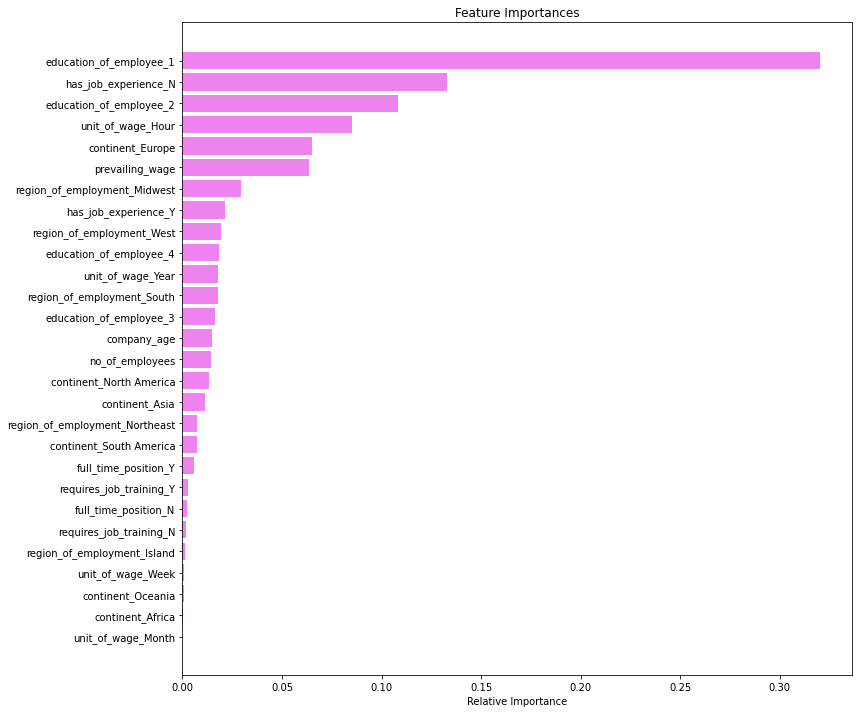

In [ ]:
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Insight:

*   The best performing model was Gradient Boosting with an F1 score of .821. 
*   The most important features were level of education- high school, and if the applicant had no previous experience. 
*   Surprisingly, third feature of importance was level of education- Bachelor's. 



## Actionable Insights and Recommendations

**Actionable Insights**
*    The model with the highest F1 score was the gradient boosting model at .81. 
*   Level of educatilon was the most important feature, with unit of wage, and job experience closely behind. 
*   The continent of Asia saw the highest number of applicants whose visas were certified. 
*   58% of applicants have job experience, and when comparing approval rate between no experience and experienced, it was fairly equal.  

This ML model indicates that level of education is the most important feature in the dataset with unit of wage closely behind. This machine learning model is prioritizing experienced, highly-educated individuals seeking salaried employment in the United States. 

**Recommendations**

The OFLC sees a range of jobs from applicants. Each job will have a different requirement for education, training, and experience. Creating a ML model which weighs high school diploma low is unhelpful if 20% of visas should be for industries that require little education. For this reason more data needs to be collected on types of jobs and industries for applicants. If industry had been included it could have been determined why midwest and high school education level saw the most denied cases. 

In addition, breaking down continent into country could provide more insights. Asia is one of the highest producers of approved applicants, but it consists of 48 countries. It could be 5 of these countries account for a majority of the approvals, but this is unknown without the country of each applicant.

Also, for future data entry, OFLC should consider entering a standardized unit of wage: either store hourly and salary separately or annualize to annual salary based on a 'regular work week'. The prevailing wage could provide exponentially more insight if this were corrected. 